#### What is Association Rule Learning Algorithm and Where is it Used?
Association Rule Learning is a rule-based machine learning technique used to discover interesting relationships, patterns, or associations among a set of items in large datasets. It is widely used in market basket analysis to understand customer purchase behavior, and it can also be applied in:

- Recommendation Systems: Suggesting products to users based on their purchase history.
- Web Usage Mining: Analyzing user navigation patterns on websites.
- Fraud Detection: Identifying unusual patterns that may indicate fraudulent activities.

#### Generate Random Data and Plot It for Association Rule Learning
Association Rule Learning often deals with categorical data, like transactions in a market basket. Here's an example of how to generate a simple dataset and visualize it:

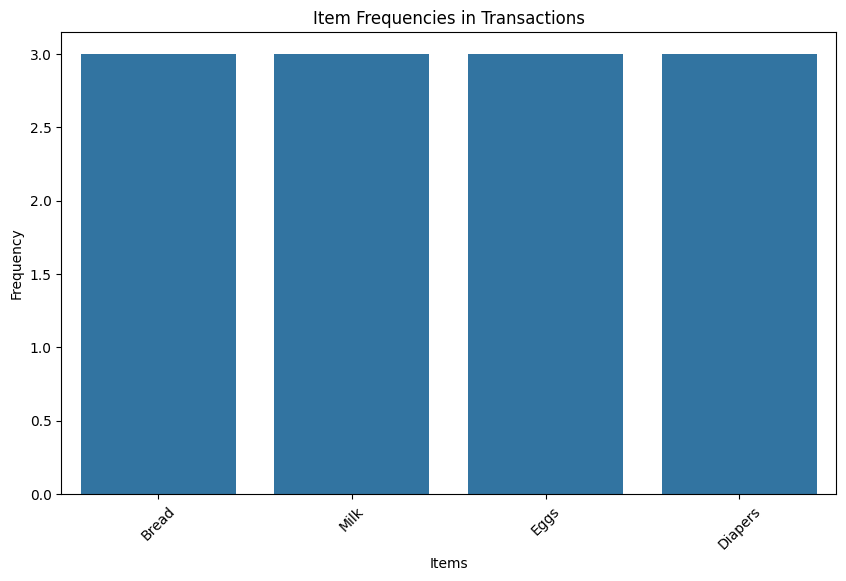

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data for transactions
data = {
    'Transaction': [1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5],
    'Item': ['Bread', 'Milk', 'Eggs', 'Bread', 'Diapers', 'Milk', 'Diapers', 'Eggs', 'Bread', 'Milk', 'Eggs', 'Diapers']
}

df = pd.DataFrame(data)

# Count the occurrences of items
item_counts = df['Item'].value_counts()

# Plotting the item frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.title('Item Frequencies in Transactions')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### Is Association Rule Learning Good for Only FBT or Some Other Cases?
While Association Rule Learning is commonly associated with Frequently Bought Together (FBT) analysis, it is not limited to this. It can also be applied in:

- Cross-selling: Identifying products that are often purchased together.
- Customer Segmentation: Understanding common characteristics or behaviors among customers.
- Social Network Analysis: Discovering patterns in user interactions.

#### Implement Association Rule Learning from Scratch Using Numpy
Here's a simple implementation of the Apriori algorithm for Association Rule Learning:


In [5]:
import numpy as np
from itertools import combinations

# Sample transaction data
transactions = [
    ['Milk', 'Bread'],
    ['Bread', 'Diapers'],
    ['Milk', 'Diapers'],
    ['Bread', 'Milk', 'Diapers'],
    ['Milk', 'Bread', 'Eggs'],
]

def create_c1(transactions):
    c1 = []
    for transaction in transactions:
        for item in transaction:
            if [item] not in c1:
                c1.append([item])
    return list(map(frozenset, c1))

def scan_d(transactions, candidates, min_support):
    item_count = {}
    for transaction in transactions:
        for candidate in candidates:
            if candidate.issubset(transaction):
                if candidate not in item_count:
                    item_count[candidate] = 1
                else:
                    item_count[candidate] += 1
    num_items = float(len(transactions))
    return (item_count, {k: v / num_items for k, v in item_count.items() if v / num_items >= min_support})

def apriori(transactions, min_support=0.5):
    c1 = create_c1(transactions)
    freq_set, support_data = scan_d(transactions, c1, min_support)
    freq_sets = [freq_set]
    k = 2
    while freq_set:
        candidates = list(map(lambda x: frozenset(x), combinations(set().union(*freq_set), k)))
        freq_set, support_k = scan_d(transactions, candidates, min_support)
        if freq_set:
            support_data.update(support_k)
            freq_sets.append(freq_set)
        k += 1
    return freq_sets, support_data

# Running Apriori
frequent_itemsets, support_data = apriori(transactions, min_support=0.5)
print("Frequent Itemsets:", frequent_itemsets)
print("Support Data:", support_data)


Frequent Itemsets: [{frozenset({'Milk'}): 4, frozenset({'Bread'}): 4, frozenset({'Diapers'}): 3, frozenset({'Eggs'}): 1}, {frozenset({'Bread', 'Milk'}): 3, frozenset({'Diapers', 'Bread'}): 2, frozenset({'Diapers', 'Milk'}): 2, frozenset({'Bread', 'Eggs'}): 1, frozenset({'Milk', 'Eggs'}): 1}, {frozenset({'Diapers', 'Bread', 'Milk'}): 1, frozenset({'Eggs', 'Bread', 'Milk'}): 1}]
Support Data: {frozenset({'Milk'}): 0.8, frozenset({'Bread'}): 0.8, frozenset({'Diapers'}): 0.6, frozenset({'Bread', 'Milk'}): 0.6}


#### When to Use Association Rule Learning and When Not to Use It
#### When to Use:

- When you have transactional data, such as purchase histories.
- When the goal is to uncover hidden relationships between items.
- When building recommendation systems.

#### When Not to Use:

- When dealing with large datasets where computational cost is a concern (can be computationally expensive).
- When the relationships are more complex and require deeper analysis (e.g., sequential patterns).

#### What is the Loss Function?
Association Rule Learning does not have a conventional loss function like supervised learning. Instead, it uses measures like:

- Support: The proportion of transactions that contain a specific itemset.
- Confidence: The likelihood that an item appears in a transaction given that another item is present.
- Lift: The ratio of the observed support to that expected if the two items were independent.

#### How to Optimize the Algorithm
- Transaction Reduction: Reduce the dataset size by removing infrequent items before analysis.
- Efficient Data Structures: Use hash trees to store candidate itemsets for faster access.
- Parallel Processing: Implement parallel computing to speed up the support counting phase.

#### What Else Should I Know About Association Rule Learning?
- Interpretability: Association rules are generally easy to interpret but may not indicate causation.
- Scalability: The algorithms can become inefficient with large datasets; consider using more efficient algorithms like FP-Growth.
- Parameter Sensitivity: The results can vary significantly based on the chosen support and confidence thresholds.

A popular package for Association Rule Learning in Python is mlxtend. It provides implementations of the Apriori and FP-Growth algorithms, which are well-suited for market basket analysis and other association rule mining tasks. Let’s experiment with a real-world dataset using this package.

#### Installation
To install mlxtend, use the following command:
```bash
pip install mlxtend
```

#### Dataset
For experimentation, the Groceries dataset from Kaggle or a similar transactional dataset can be used. Get data here: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

#### Steps
- Load the Dataset: Convert transactions into the required format.
- Generate Frequent Itemsets: Using the Apriori algorithm.
- Extract Association Rules: Calculate rules based on minimum confidence and lift thresholds.

#### Example Code

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
# For example, let's use a sample 'Groceries.csv' where each row represents a transaction
# Replace 'Groceries.csv' with your own transactional data file path
df = pd.read_csv('Groceries.csv')

# Sample preprocessing
# Convert dataset into one-hot encoded format required by Apriori
basket = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Extract association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display results
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules.head())


#### Explanation
- Dataset Format: Each transaction is transformed into a one-hot encoded format.
- apriori(): Finds frequent itemsets that meet the min_support threshold.
- association_rules(): Derives rules using confidence and other metrics.

#### Tips for Real-World Data
- Adjust Support/Confidence: Lower thresholds help find less frequent, potentially valuable rules.
- Data Preprocessing: Ensure that data is clean and organized in a one-hot encoded format.
- Experiment with Metrics: Use lift, leverage, and conviction as additional metrics for filtering rules.


Apache Spark provides a built-in library for performing Association Rule Learning through its MLlib library. You can use the FP-Growth algorithm, which is often more efficient than the Apriori algorithm for larger datasets. Here’s how you can perform Association Rule Learning using PySpark.

#### Setting Up PySpark
First, make sure you have PySpark installed. Using a container might be the best

#### Example Code Using PySpark
Here’s an example of how to implement Association Rule Learning using the FP-Growth algorithm in PySpark.

- Start a Spark Session.
- Load the Dataset.
- Transform Data.
- Apply FP-Growth.
- Extract Association Rules.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth

# Start Spark session
spark = SparkSession.builder \
    .appName("AssociationRuleLearning") \
    .getOrCreate()

# Load dataset
# Assuming the dataset is in a CSV format, with a 'Transaction' and 'Item' column
# Replace 'groceries.csv' with the path to your dataset
data = spark.read.csv('groceries.csv', header=True)

# Prepare data for FP-Growth
# Group items by transaction
transactions = data.groupBy("Transaction").agg(collect_list("Item").alias("items"))

# Create FP-Growth model
fp_growth = FPGrowth(itemsCol="items", minSupport=0.01, minConfidence=0.2)

# Fit the model
model = fp_growth.fit(transactions)

# Display frequent itemsets
print("Frequent Itemsets:")
model.freqItemsets.show(truncate=False)

# Display association rules
print("Association Rules:")
model.associationRules.show(truncate=False)

# Stop the Spark session
spark.stop()


#### Submitting as a Spark Job
If you want to run the above code as a Spark job using spark-submit, save the code in a Python script (e.g., association_rule_learning.py). You can submit the job using:

```bash
spark-submit association_rule_learning.py
```